In [1]:
# for dataset management
import pandas as pd

# for data visualization 
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# Load and convert data into data loaders

In [2]:
import sys
sys.path.append('../utils')
sys.path.append('../models')

In [3]:
from data_loaders import reorgnize_dataloaders

In [4]:
# create dataloaders    
train_loader, test_loader = reorgnize_dataloaders(train_batch_size=32, test_batch_size=32)

torch.Size([1597, 11])


# Train the model

In [5]:
# create class for the model with batch-normalization  
from wine_batchNorm import WineModel_BNorm

In [6]:
from training import trainTheM0del

In [7]:
num_epochs = 1000
act_funs = ['relu','tanh','sigmoid']
metrics = ['loss','train acc','test acc']
classes = []

In [8]:
for actFun in act_funs:
    model = WineModel_BNorm(actFun=actFun)
    losses, train_accuracy, test_accuracy = trainTheM0del(
        doBN=False,
        model=model,
        train_loader=train_loader,
        test_loader=test_loader,
        num_epochs=num_epochs)
    classes.append({
        'name': actFun,
        'loss': losses,
        'train acc': train_accuracy,
        'test acc': test_accuracy
    })
    
    

In [ ]:
import importlib # we use this to re-run the cell when the module is updated
import performance_plots

# Reload the module
importlib.reload(performance_plots)

# Now you can use the updated module
from performance_plots import comparison_plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


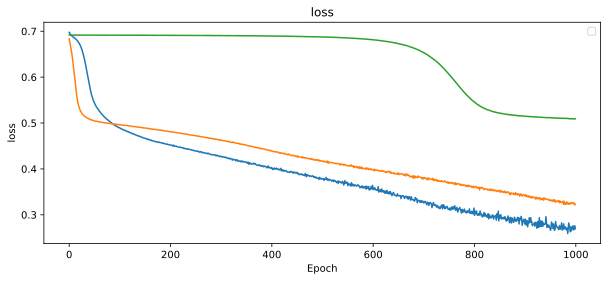

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


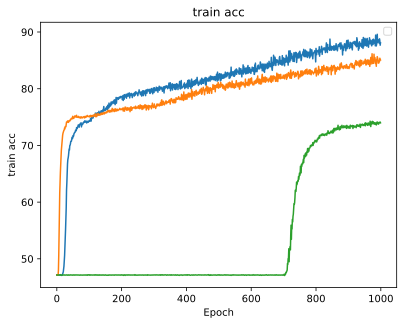

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


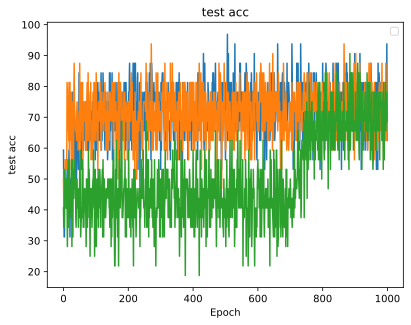

In [12]:
comparison_plot(metrics,classes)